<a href="https://colab.research.google.com/github/dhan-t/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [30]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [13]:
# put your answer here
df = pd.read_excel('personality.xlsx')
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Adonis,1,1,0,0,1
1,Aldrin,1,0,1,1,0
2,Alexi,0,0,0,1,1
3,Aljean,1,1,1,0,0
4,Allen,0,0,1,0,0


1. Display the summary of all the features of the dataset using `.info()`

In [14]:
# put your answer here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [16]:
# put your answer here
df.value_counts()

,,,,,,count
Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality,
Adonis,1,1,0,0,1,1
Mureigne,1,1,1,1,1,1
Jen,0,0,0,0,1,1
Jerico,1,1,1,1,0,1
Jess,0,1,0,1,1,1
Jillian,1,0,0,0,0,1
Jirou,0,1,1,0,1,1
Jomar,1,0,1,0,0,1
Kit,0,0,1,1,1,1


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [20]:
# put your answer here
X = df.drop(columns=['Name', 'Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [21]:
# put your answer here
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [28]:
# put your answer here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

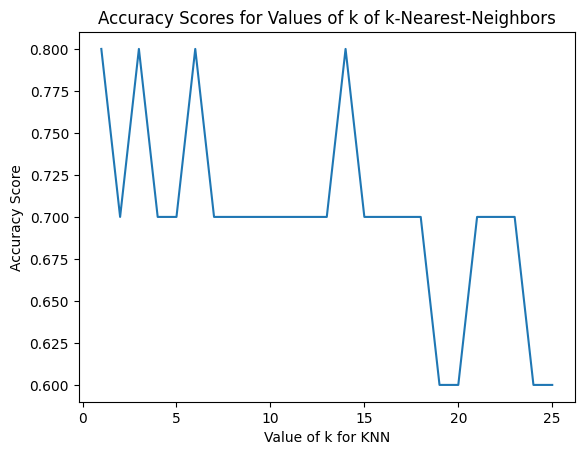

In [36]:
# put your answer here
knn = KNeighborsClassifier()
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)


7. Train the model using the `.fit()`

In [37]:
# put your answer here
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

8. Test the model using the `.predict()`

In [38]:
# put your answer here
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 0 0 1]


## Evaluate the model

9. Create a confusion matrix

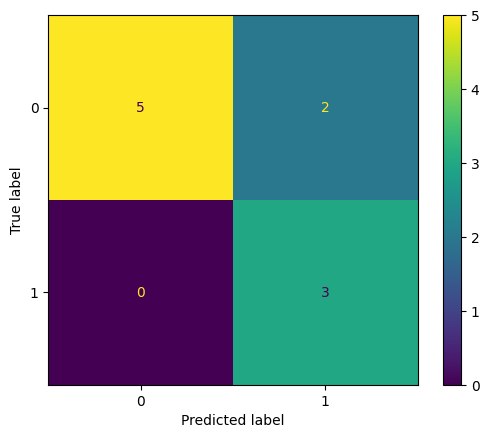

In [40]:
# put your answer here
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [41]:
# put your answer here
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

11. Display the precision

In [42]:
# put your answer here
precision = precision_score(y_test, y_pred)
precision

1.0

12. Display the recall

In [43]:
# put your answer here
recall = recall_score(y_test, y_pred)
recall

0.6

13. Display the f1-score

In [44]:
# put your answer here
f1 = f1_score(y_test, y_pred)
f1

0.7499999999999999